# Gaussian Filter

## What is a Gaussian Filter?

A **Gaussian filter** is a linear spatial filter that uses a Gaussian (bell-shaped) function to weight the neighborhood pixels. Unlike the box filter which uses uniform weights, the Gaussian filter gives **more weight to nearby pixels** and **less weight to distant pixels**.

### Mathematical Definition

The 2D Gaussian function is:

$$G(x, y) = \frac{1}{2\pi\sigma^2} e^{-\frac{x^2 + y^2}{2\sigma^2}}$$

Where:
- $\sigma$ (sigma) = standard deviation, controls the spread
- Larger $\sigma$ → wider spread → more blur
- Smaller $\sigma$ → narrower spread → less blur

### Example 3×3 Gaussian Kernel

For $\sigma = 1.0$:

$$\frac{1}{16} \begin{bmatrix}
1 & 2 & 1 \\
2 & 4 & 2 \\
1 & 2 & 1
\end{bmatrix}$$

**Notice:** Center has highest weight (4), neighbors have medium weight (2), corners have lowest weight (1).

### Key Characteristics

- **Type:** Linear filter (weighted sum)
- **Weights:** Higher at center, lower at edges (bell curve)
- **Effect:** Smooth blurring, better than box filter
- **Separable:** Can be applied in two 1D passes (efficient)
- **Normalization:** Sum of weights = 1 (preserves brightness)

### Gaussian vs Box Filter

| Feature | Box Filter | Gaussian Filter |
|---------|-----------|-----------------|
| Weights | Uniform (all equal) | Weighted (bell curve) |
| Edge preservation | Poor | Better |
| Artifacts | Boxy/blocky | Smoother |
| Quality | Lower | Higher |
| Speed | Faster | Slightly slower |
| Use case | Quick smoothing | Quality smoothing |

### Applications

- **Noise reduction:** Reduces Gaussian noise while preserving edges better
- **Image preprocessing:** Before edge detection or other operations
- **Blur effects:** Natural-looking blur
- **Scale-space representation:** Multi-scale image analysis
- **Feature detection:** Part of SIFT, SURF, etc.

### Advantages & Disadvantages

**Advantages:**
- Better edge preservation than box filter
- Smoother, more natural results
- No ringing artifacts
- Mathematically well-founded
- Rotationally symmetric

**Disadvantages:**
- Slightly slower than box filter
- Still blurs edges (not edge-preserving)
- Fixed kernel (less flexible than bilateral filter)

## OpenCV Function: cv2.GaussianBlur()

**Syntax:**
```python
result = cv2.GaussianBlur(src, ksize, sigmaX, sigmaY=None, borderType=cv2.BORDER_DEFAULT)
```

**Parameters:**

- `src`: Input image (grayscale or color)
- `ksize`: Kernel size as tuple `(width, height)`, **must be odd and positive**, e.g., `(3, 3)`, `(5, 5)`
- `sigmaX`: Standard deviation in X direction
  - If `sigmaX = 0`, it is calculated from kernel size: $\sigma = 0.3 \times ((ksize - 1) \times 0.5 - 1) + 0.8$
  - If `sigmaX > 0`, uses the specified value
- `sigmaY`: Standard deviation in Y direction (optional)
  - If `None` or `0`, it is set equal to `sigmaX`
  - For different blur in X and Y directions, specify different values
- `borderType`: Pixel extrapolation method (same as box filter)
  - `cv2.BORDER_DEFAULT`: Reflect 101 (default)
  - `cv2.BORDER_CONSTANT`: Pad with zeros
  - `cv2.BORDER_REPLICATE`: Repeat edge pixels

**Important Notes:**

1. **Kernel size must be odd:** (3, 3), (5, 5), (7, 7), etc.
2. **sigmaX = 0:** Let OpenCV compute sigma automatically
3. **Larger sigma:** More blur
4. **Kernel size and sigma related:** Larger kernel needs larger sigma

## Example 1: Basic Gaussian Filter

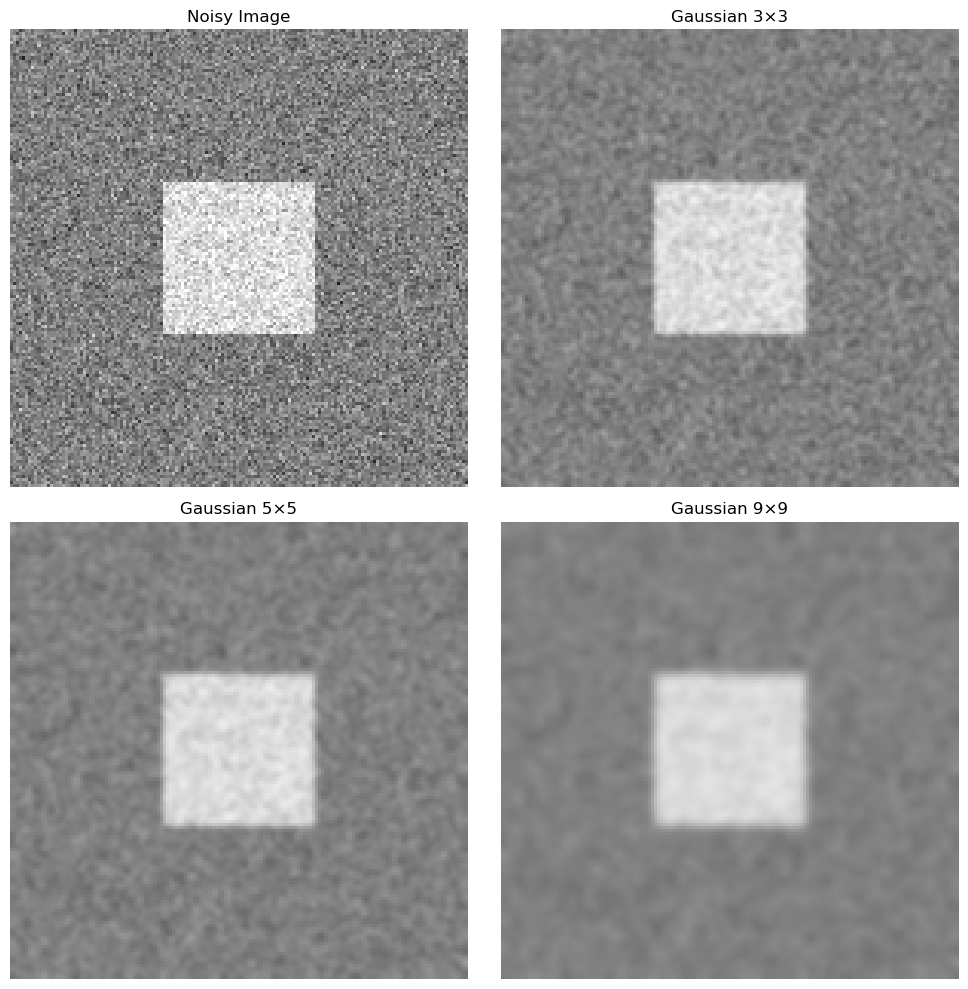

Results:
Noisy image noise (std): 37.8
After 3×3 Gaussian:      29.5
After 5×5 Gaussian:      28.6
After 9×9 Gaussian:      27.6


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Create a simple test image
np.random.seed(20)
image = np.ones((150, 150), dtype=np.uint8) * 128
image[50:100, 50:100] = 220  # Bright square

# Add noise
noise = np.random.normal(0, 25, image.shape)
noisy_image = np.clip(image + noise, 0, 255).astype(np.uint8)

# Apply Gaussian filter with automatic sigma
gaussian_3x3 = cv2.GaussianBlur(noisy_image, (3, 3), 0)
gaussian_5x5 = cv2.GaussianBlur(noisy_image, (5, 5), 0)
gaussian_9x9 = cv2.GaussianBlur(noisy_image, (9, 9), 0)

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0, 0].imshow(noisy_image, cmap='gray', vmin=0, vmax=255)
axes[0, 0].set_title('Noisy Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(gaussian_3x3, cmap='gray', vmin=0, vmax=255)
axes[0, 1].set_title('Gaussian 3×3')
axes[0, 1].axis('off')

axes[1, 0].imshow(gaussian_5x5, cmap='gray', vmin=0, vmax=255)
axes[1, 0].set_title('Gaussian 5×5')
axes[1, 0].axis('off')

axes[1, 1].imshow(gaussian_9x9, cmap='gray', vmin=0, vmax=255)
axes[1, 1].set_title('Gaussian 9×9')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

print("Results:")
print(f"Noisy image noise (std): {noisy_image.std():.1f}")
print(f"After 3×3 Gaussian:      {gaussian_3x3.std():.1f}")
print(f"After 5×5 Gaussian:      {gaussian_5x5.std():.1f}")
print(f"After 9×9 Gaussian:      {gaussian_9x9.std():.1f}")

## Example 2: Effect of Sigma (σ)

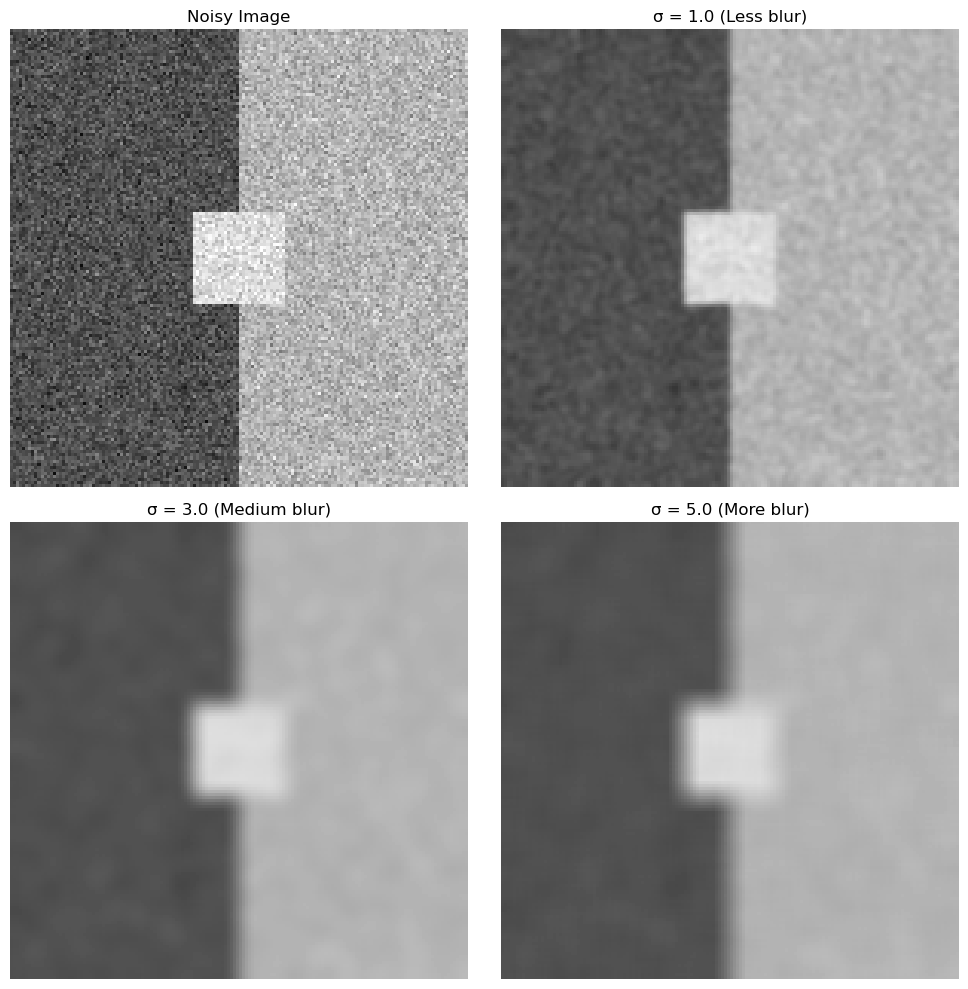

Observation:
- Same kernel size (11×11) but different sigma
- Larger σ → More blur
- σ controls the spread of the Gaussian curve


In [12]:
# Create test image with edges
test_img = np.zeros((150, 150), dtype=np.uint8)
test_img[:, :75] = 80   # Left side dark
test_img[:, 75:] = 180  # Right side bright
test_img[60:90, 60:90] = 220  # Bright square in center

# Add noise
noise = np.random.normal(0, 20, test_img.shape)
noisy = np.clip(test_img + noise, 0, 255).astype(np.uint8)

# Apply Gaussian filter with SAME kernel size but DIFFERENT sigma
blur_sigma_1 = cv2.GaussianBlur(noisy, (11, 11), sigmaX=1.0)
blur_sigma_3 = cv2.GaussianBlur(noisy, (11, 11), sigmaX=3.0)
blur_sigma_5 = cv2.GaussianBlur(noisy, (11, 11), sigmaX=5.0)

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0, 0].imshow(noisy, cmap='gray', vmin=0, vmax=255)
axes[0, 0].set_title('Noisy Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(blur_sigma_1, cmap='gray', vmin=0, vmax=255)
axes[0, 1].set_title('σ = 1.0 (Less blur)')
axes[0, 1].axis('off')

axes[1, 0].imshow(blur_sigma_3, cmap='gray', vmin=0, vmax=255)
axes[1, 0].set_title('σ = 3.0 (Medium blur)')
axes[1, 0].axis('off')

axes[1, 1].imshow(blur_sigma_5, cmap='gray', vmin=0, vmax=255)
axes[1, 1].set_title('σ = 5.0 (More blur)')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

print("Observation:")
print("- Same kernel size (11×11) but different sigma")
print("- Larger σ → More blur")
print("- σ controls the spread of the Gaussian curve")

## Example 3: Gaussian vs Box Filter Comparison

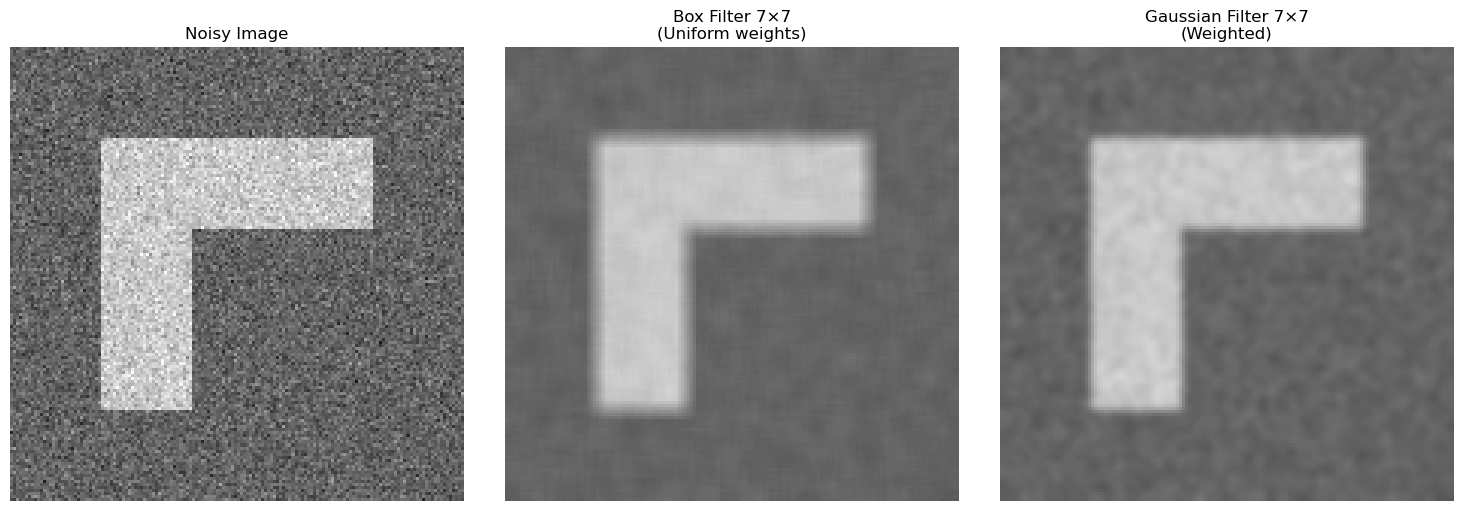

Comparison:
Box filter std:      38.1
Gaussian filter std: 39.0

Gaussian filter preserves edges better than box filter


In [13]:
# Create image with clear edges
image = np.ones((150, 150), dtype=np.uint8) * 100
image[30:120, 30:60] = 200   # Vertical bar
image[30:60, 30:120] = 200   # Horizontal bar (creates L-shape)

# Add noise
noise = np.random.normal(0, 20, image.shape)
noisy = np.clip(image + noise, 0, 255).astype(np.uint8)

# Apply both filters with same kernel size
box_filtered = cv2.blur(noisy, (7, 7))
gaussian_filtered = cv2.GaussianBlur(noisy, (7, 7), 0)

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(noisy, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Noisy Image')
axes[0].axis('off')

axes[1].imshow(box_filtered, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Box Filter 7×7\n(Uniform weights)')
axes[1].axis('off')

axes[2].imshow(gaussian_filtered, cmap='gray', vmin=0, vmax=255)
axes[2].set_title('Gaussian Filter 7×7\n(Weighted)')
axes[2].axis('off')

plt.tight_layout()
plt.show()

print("Comparison:")
print(f"Box filter std:      {box_filtered.std():.1f}")
print(f"Gaussian filter std: {gaussian_filtered.std():.1f}")
print("\nGaussian filter preserves edges better than box filter")

## Example 4: Visualizing Gaussian Kernel

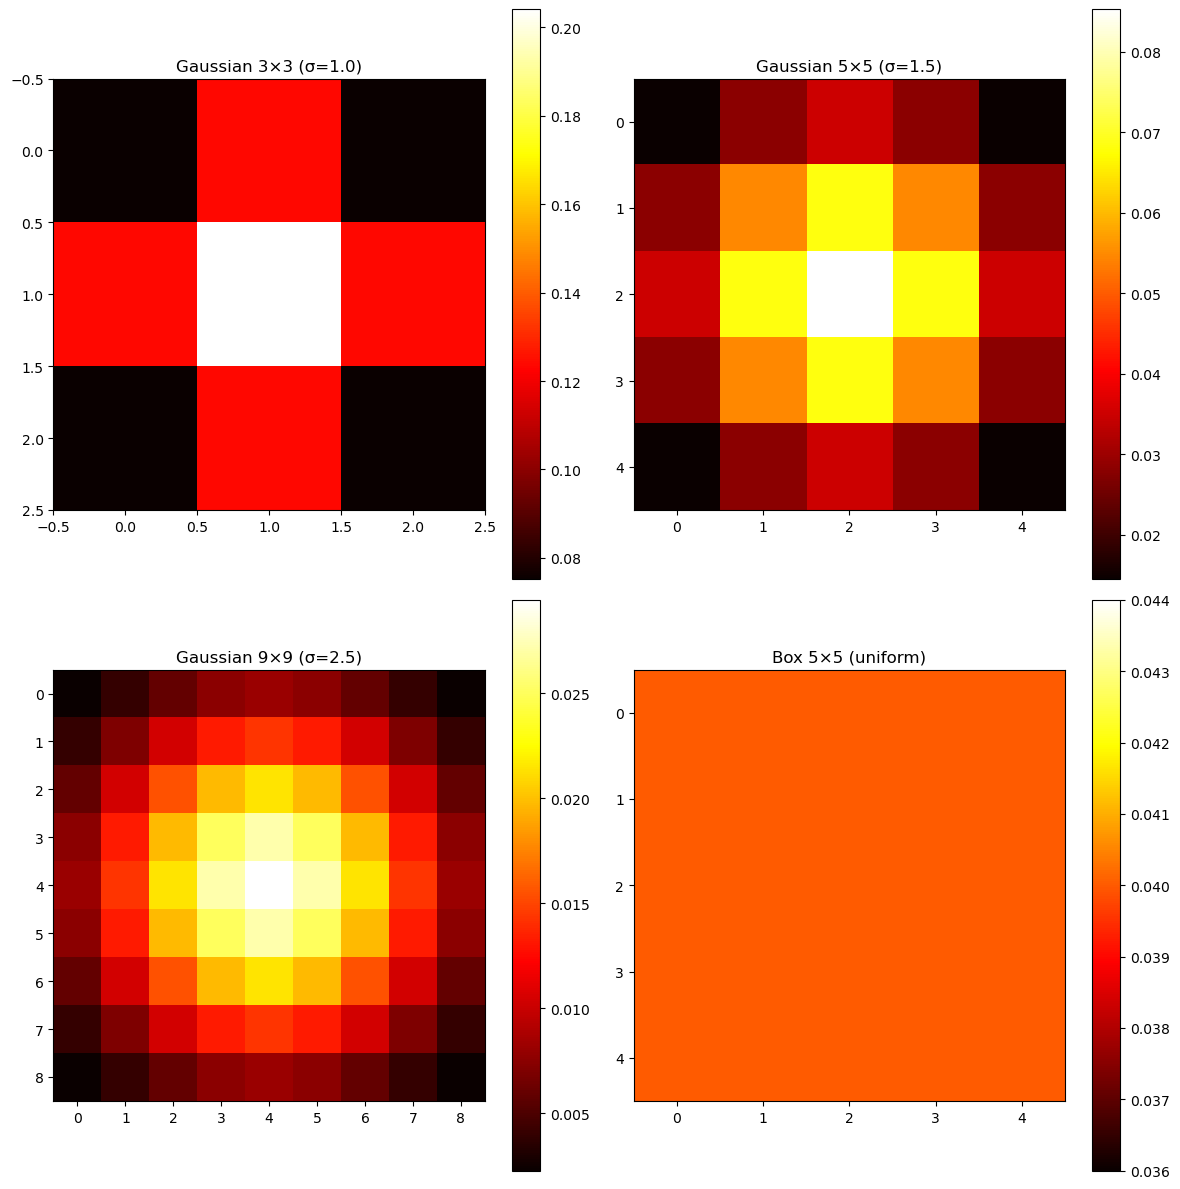

3×3 Gaussian Kernel (σ=1.0):
[[0.07511361 0.1238414  0.07511361]
 [0.1238414  0.20417996 0.1238414 ]
 [0.07511361 0.1238414  0.07511361]]

Center weight: 0.2042
Edge weight:   0.1238
Corner weight: 0.0751

Notice: Center has highest weight, corners have lowest


In [14]:
# Create Gaussian kernels manually to visualize
def create_gaussian_kernel(size, sigma):
    """Create a Gaussian kernel"""
    kernel = np.zeros((size, size))
    center = size // 2
    
    for i in range(size):
        for j in range(size):
            x = i - center
            y = j - center
            kernel[i, j] = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    
    # Normalize
    kernel = kernel / kernel.sum()
    return kernel

# Create different kernels
kernel_3x3 = create_gaussian_kernel(3, 1.0)
kernel_5x5 = create_gaussian_kernel(5, 1.5)
kernel_9x9 = create_gaussian_kernel(9, 2.5)

# Create box kernel for comparison
box_kernel = np.ones((5, 5)) / 25

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

im0 = axes[0, 0].imshow(kernel_3x3, cmap='hot')
axes[0, 0].set_title('Gaussian 3×3 (σ=1.0)')
plt.colorbar(im0, ax=axes[0, 0])

im1 = axes[0, 1].imshow(kernel_5x5, cmap='hot')
axes[0, 1].set_title('Gaussian 5×5 (σ=1.5)')
plt.colorbar(im1, ax=axes[0, 1])

im2 = axes[1, 0].imshow(kernel_9x9, cmap='hot')
axes[1, 0].set_title('Gaussian 9×9 (σ=2.5)')
plt.colorbar(im2, ax=axes[1, 0])

im3 = axes[1, 1].imshow(box_kernel, cmap='hot')
axes[1, 1].set_title('Box 5×5 (uniform)')
plt.colorbar(im3, ax=axes[1, 1])

plt.tight_layout()
plt.show()

# Print 3x3 kernel values
print("3×3 Gaussian Kernel (σ=1.0):")
print(kernel_3x3)
print(f"\nCenter weight: {kernel_3x3[1,1]:.4f}")
print(f"Edge weight:   {kernel_3x3[0,1]:.4f}")
print(f"Corner weight: {kernel_3x3[0,0]:.4f}")
print("\nNotice: Center has highest weight, corners have lowest")

## Example 5: Edge Preservation Comparison

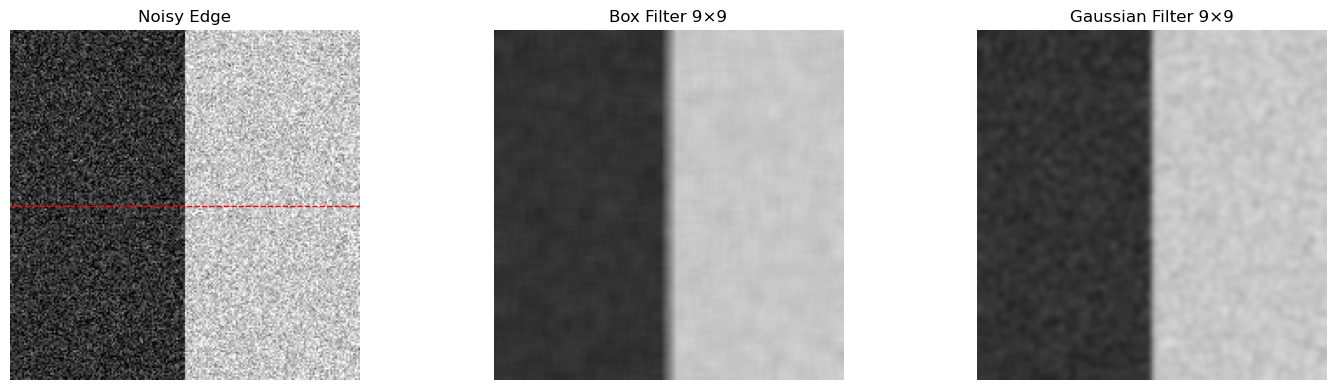

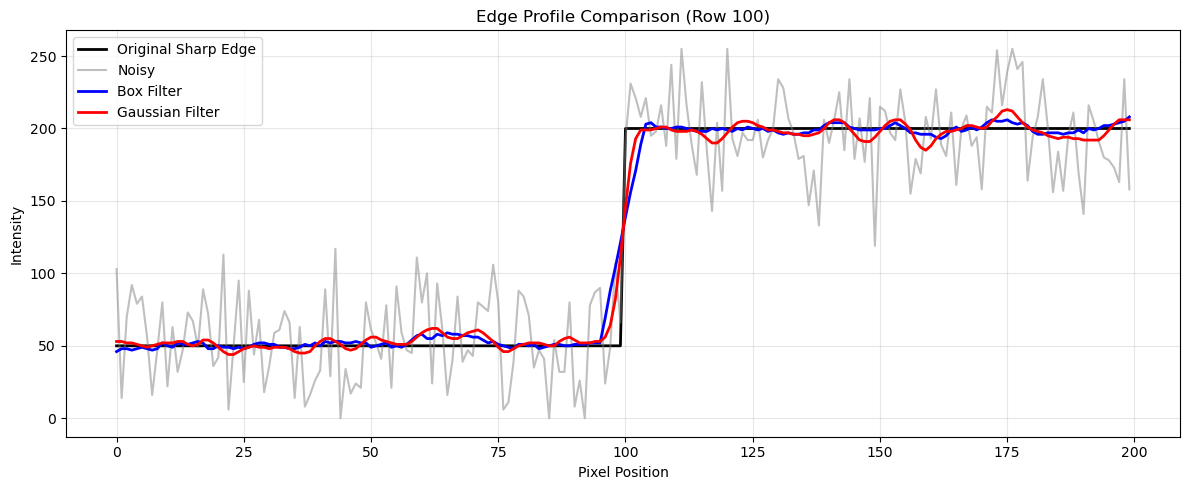

Observation:
- Noisy image has SHARP edge but with noise
- Both filters REDUCE NOISE but also BLUR the edge
- This is the fundamental tradeoff: noise reduction vs edge sharpness
- Gaussian filter preserves edge better than box filter
- But even Gaussian blurs the edge to reduce noise

Key Point: Smoothing filters cannot perfectly preserve sharp edges


In [15]:
# Create sharp edge test image
edge_image = np.zeros((200, 200), dtype=np.uint8)
edge_image[:, :100] = 50   # Dark left half
edge_image[:, 100:] = 200  # Bright right half

# Add MORE noise to make it visible
noise = np.random.normal(0, 30, edge_image.shape)  # Increased from 15 to 30
noisy_edge = np.clip(edge_image + noise, 0, 255).astype(np.uint8)

# Apply filters
box_result = cv2.blur(noisy_edge, (9, 9))
gaussian_result = cv2.GaussianBlur(noisy_edge, (9, 9), 0)

# Extract profiles across the edge (middle row)
row = 100
profile_original = edge_image[row, :]
profile_noisy = noisy_edge[row, :]
profile_box = box_result[row, :]
profile_gaussian = gaussian_result[row, :]

# Visualize images
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].imshow(noisy_edge, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Noisy Edge')
axes[0].axhline(row, color='red', linewidth=1, linestyle='--')
axes[0].axis('off')

axes[1].imshow(box_result, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Box Filter 9×9')
axes[1].axis('off')

axes[2].imshow(gaussian_result, cmap='gray', vmin=0, vmax=255)
axes[2].set_title('Gaussian Filter 9×9')
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Plot edge profiles
plt.figure(figsize=(12, 5))
plt.plot(profile_original, 'k-', linewidth=2, label='Original Sharp Edge')
plt.plot(profile_noisy, 'gray', alpha=0.5, label='Noisy')
plt.plot(profile_box, 'b-', linewidth=2, label='Box Filter')
plt.plot(profile_gaussian, 'r-', linewidth=2, label='Gaussian Filter')
plt.xlabel('Pixel Position')
plt.ylabel('Intensity')
plt.title('Edge Profile Comparison (Row 100)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Observation:")
print("- Noisy image has SHARP edge but with noise")
print("- Both filters REDUCE NOISE but also BLUR the edge")
print("- This is the fundamental tradeoff: noise reduction vs edge sharpness")
print("- Gaussian filter preserves edge better than box filter")
print("- But even Gaussian blurs the edge to reduce noise")
print("\nKey Point: Smoothing filters cannot perfectly preserve sharp edges")

## Summary

### Key Points

**Gaussian Filter Characteristics:**
- Uses bell-shaped (Gaussian) weighting function
- Higher weight at center, lower at edges
- Controlled by sigma (σ) parameter
- Better quality than box filter
- Separable (efficient implementation)

### OpenCV Function

```python
result = cv2.GaussianBlur(src, ksize, sigmaX, sigmaY=None, borderType=cv2.BORDER_DEFAULT)
```

**Key parameters:**
- `ksize`: Kernel size (must be odd), e.g., (3,3), (5,5), (7,7)
- `sigmaX`: Standard deviation (0 = auto-calculate)
- Larger sigma → More blur

### Gaussian vs Box Filter

| Aspect | Box Filter | Gaussian Filter |
|--------|-----------|-----------------|
| **Weights** | Uniform (all equal) | Bell curve (center heavy) |
| **Quality** | Lower | Higher |
| **Edge preservation** | Poor | Better |
| **Artifacts** | Blocky | Smooth |
| **Speed** | Faster | Slightly slower |
| **Naturalness** | Less natural | More natural |

### Parameter Guidelines

**Kernel Size:**
- **3×3**: Light blur, minimal smoothing
- **5×5**: Moderate blur, good for general use
- **7×7 to 11×11**: Heavy blur
- **Must be odd**: (3,3), (5,5), (7,7), etc.

**Sigma (σ):**
- **σ = 0**: Auto-calculate (recommended)
- **σ = 1.0**: Narrow spread, less blur
- **σ = 3.0**: Medium spread, moderate blur
- **σ = 5.0**: Wide spread, heavy blur
- **Rule of thumb**: σ ≈ 0.3 × ((ksize - 1) × 0.5 - 1) + 0.8

### When to Use Gaussian Filter

**Best for:**
- Noise reduction with edge preservation
- Image preprocessing before edge detection
- Creating natural blur effects
- Quality applications where speed is not critical
- Medical image processing
- Computer vision pipelines

**Choose Box Filter instead when:**
- Speed is critical
- Simple/rough smoothing is enough
- Computational resources limited

### Practical Tips

1. **Start with sigmaX=0** (auto mode) for most cases
2. **Use odd kernel sizes** (3, 5, 7, 9, 11)
3. **Larger kernel needs larger sigma** for proper effect
4. **For anisotropic blur**, specify different sigmaX and sigmaY
5. **Multiple passes of small kernel** ≈ one pass of large kernel
6. **Check edge preservation** by comparing before/after

### Common Applications

1. **Noise reduction**: Primary use case
2. **Gaussian pyramid**: Multi-scale image representation
3. **Difference of Gaussians (DoG)**: Edge detection, feature detection
4. **Unsharp masking**: Image sharpening (original - blurred)
5. **Background subtraction**: Preprocessing
6. **Motion blur simulation**: With appropriate kernel